In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titan = sns.load_dataset('titanic')
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titan.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
def draw_dist(col_name):
    plt.figure(figsize=(6,6))
    sns.distplot(titan[col_name])
    plt.grid()
    plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_38548\1616351595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titan[col_name])


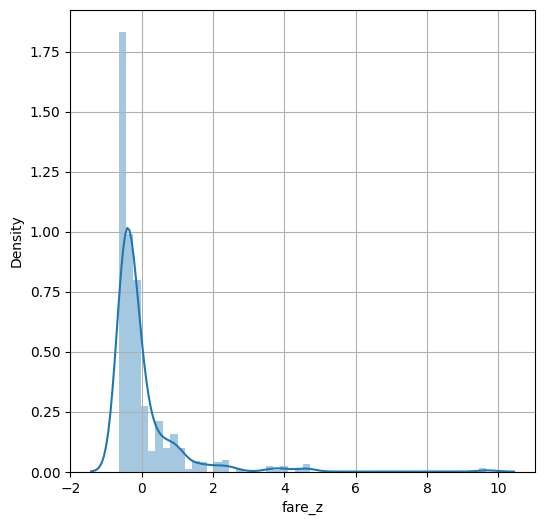

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# np.array로 바꿔줘야 하는 게 특징.

titan['fare_z'] = StandardScaler().fit_transform(np.array(titan.fare).
                                                reshape(-1,1)).reshape(-1,)
# StandardScaler(표준화)

# 표준 정규 분포화
# 평균 0, 분산 1 데이터
# 정규화 하는 이유 : 세상에 많은 랜덤 물리현상은
# 분포가 평균 0, 분산1 데이터로 변경하게 되면, 예측분석에
# 용이하기 때문..

# StandardScaler(*, copy = True 
            # false입력 시 현장에 작성된 스케일링 사용
    
#                , with_mean = True

            # True시 스케일링 전에 중앙값 이동 진행
    
#                , with_std = True)

            # True시 분산 1에 맞춰 Scale을 진행.

draw_dist('fare_z')

C:\Users\Playdata\AppData\Local\Temp\ipykernel_38548\1616351595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titan[col_name])


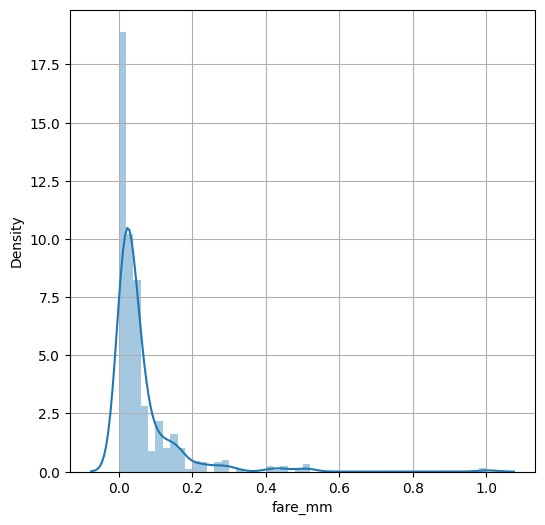

In [6]:
titan['fare_mm'] = MinMaxScaler().fit_transform(np.array
                                               (titan.fare)
                                               .reshape(-1,1)).reshape(-1,)
# 객체를 생성하여 표준화와 마찬가지로 fit으로 학습
# transform으로 변환

# MinMaxScaler 정규화는 최대와 최소가 0~1로 모든 숫자들이
# 정규화된 걸 확인.

draw_dist('fare_mm')

C:\Users\Playdata\AppData\Local\Temp\ipykernel_38548\1616351595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titan[col_name])


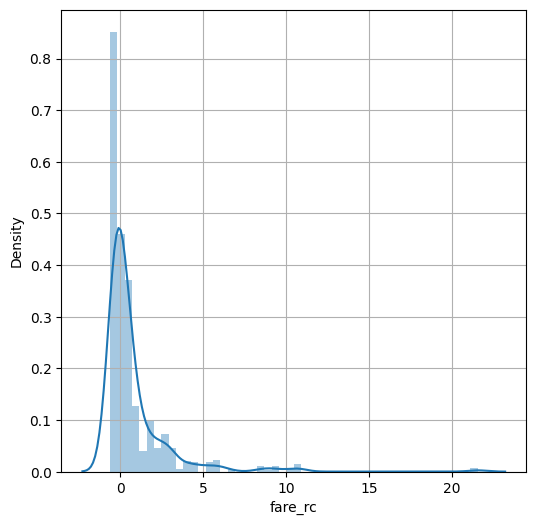

In [8]:
titan['fare_rc'] = RobustScaler().fit_transform(np.array
                                               (titan.fare).
                                               reshape(-1,1)).reshape(-1,)
# RobustScaler는 평균과 분산 대신에 중간값과 사분위 값 사용
# 중앙값 median과 IQR(interquartile range) 사용
# 이상치의 영향을 최소화
# 이 스케일러는 중앙값을 제거하고, quartile 범위에 따라
# 데이터를 스케일링.
# IQR은 1분위와 3분위 사이의 범위

draw_dist('fare_rc')